In [314]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat

# TD1

## Exercice 1

In [315]:
m = np.array([2, 3])
V = np.array([[9, 1], [1, 4]])

def simul(n, m, V):
    d = m.shape[0]

    L = np.linalg.cholesky(V)
    Z = np.random.normal(0, 1, (d, n))

    return np.matmul(L, Z) + m[:, np.newaxis]

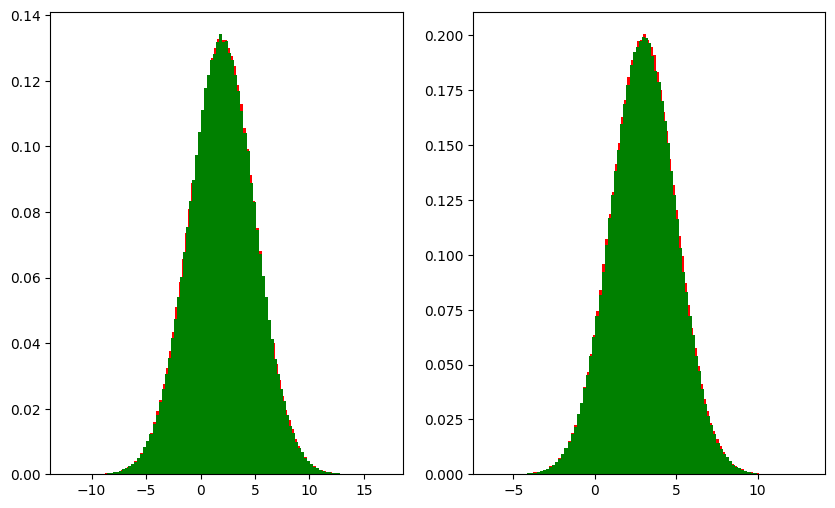

In [316]:
X = simul(10**6, m, V)
Y = np.random.multivariate_normal(m, V, 10**6).T

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(X[0,:], bins=100, color='red', density=True)
plt.hist(Y[0,:], bins=100, color='green', density=True)

plt.subplot(1, 2, 2)
plt.hist(X[1,:], bins=100, color='red', density=True)
plt.hist(Y[1,:], bins=100, color='green', density=True)
plt.show()

In [317]:
_, p_value = stat.ks_2samp(X[0,:], Y[0,:])
print("p_val 1:", p_value)
_, p_value = stat.ks_2samp(X[1,:], Y[1,:])
print("p_val 2:", p_value)

p_val 1: 0.5731974753799829
p_val 2: 0.7330230319287855


## Exercice 2

In [318]:
def d_mc(n, n_simul=10**5):
    return np.mean((np.random.standard_cauchy((n, n_simul)) >= 40), axis=1)

Avec n_simul le nombre de simulations effectuées pour une Monte-Carlo et n le nombre de Monte-Carlo souhaitée (afin de comparer la variance des estimations).

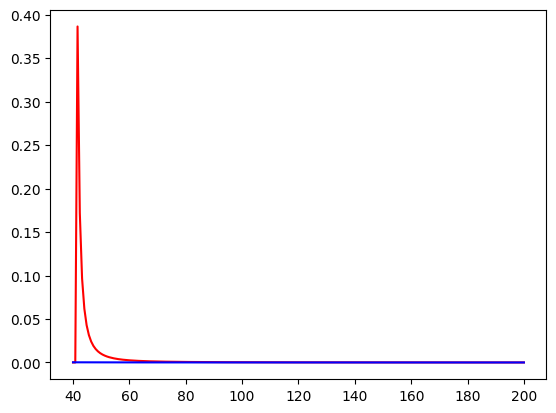

In [319]:
x = np.linspace(40, 200, 200)
plt.plot(x, stat.pareto.pdf(x, 1, 40), color='red')
plt.plot(x, stat.cauchy.pdf(x, 0, 1), color='blue')
plt.show()

On va donc naturellement choisir $k=1$ et $a=40$.

\begin{align*}
\mathbb{P}(X \ge 40) = \mathbb{E}(\mathbb{1}_{X \ge 40}) &= \int_{40}^\infty f_C(x)dx \\

&=\int_{40}^\infty f_C(x)/f_P(x)~f_P(x)dx=\mathbb{E}\left(\mathbb{1}_{X' \ge 40}~\frac{f_C(X')}{f_P(X')}\right)=\mathbb{E}\left(\frac{f_C(X')}{f_P(X')}\right).
\end{align*}

Avec $X' \sim \text{Pareto}(k=1, a=40)$

In [320]:
def pref(n, n_simul=10**5):
    X = stat.pareto.rvs(1, loc=1, scale=40, size=(n, n_simul))
    f_C = stat.cauchy.pdf(X, 0, 1)
    f_P = stat.pareto.pdf(X, 1, loc=0, scale=40)


    return np.mean(f_C/f_P, axis=1)

In [321]:
var_mc = np.var(d_mc(150))
var_pref = np.var(pref(150))

In [322]:
print(var_mc, var_pref)

8.412238222222227e-08 2.311271139167018e-17


On constate bien que la variance des estimations est **grandement** améliorée, d'un facteur $4\times10^{9}$.

## Exercice 3

In [323]:
def simul_W(min_points=10_000, init=0):

    t = np.linspace(0, 1, 11)
    W = np.concatenate(([0], np.cumsum(np.random.normal(0, np.sqrt(np.diff(t))))))
    while len(t) < min_points:

        mid_points_t = (t[:-1] + t[1:])/2
        mid_points_W = (W[1:] + W[:-1])/2 + np.random.normal(0, np.sqrt((np.diff(t))/4))

        tmp_t = np.empty(len(t) + len(mid_points_t))
        tmp_t[::2] = t
        tmp_t[1::2] = mid_points_t
        t = tmp_t

        tmp_W = np.empty(len(W) + len(mid_points_W))
        tmp_W[0::2] = W
        tmp_W[1::2] = mid_points_W
        W = tmp_W
    W += init
    return t, W

In [324]:
t, traj = simul_W()

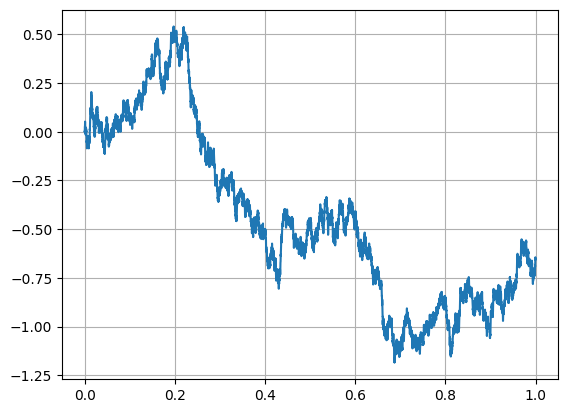

In [325]:
plt.plot(t, traj)
plt.grid(True)
plt.show()

## Exercice 4

On souhaite estimer

\begin{equation*}
J = \mathbb{E}\left[ \left( \frac12 e^{-\sigma^2/2 + \sigma X_1} + \frac12 e^{-\sigma^2/2 + \sigma X_2} - 1 \right)^+  \right]
\end{equation*}

In [326]:
Sigma = np.array([[2, 0.5], [0.5, 1]])
sigma, n_tirages = 0.2, 5000

In [327]:
def f(X, sig):
    return np.maximum(0, 1/2 * np.exp(-sig**2 / 2 + sig*X[:,0]) + 1/2 * np.exp(-sig**2 / 2 + sig*X[:,1]) - 1)

In [328]:
def J_mc(n=n_tirages, cov_mat=Sigma, sig=sigma):
    X = np.random.multivariate_normal([0, 0], cov_mat, n)
    
    Y = f(X, sig)

    return np.mean(Y), np.mean(Y) - 1.96 * np.std(Y)/np.sqrt(n), np.mean(Y) + 1.96 * np.std(Y)/np.sqrt(n)

In [329]:
J_mc()

(np.float64(0.08372169940857446),
 np.float64(0.07987402957626259),
 np.float64(0.08756936924088633))

On pose $$Z\sim\mathcal{N}(0,~I_2)\quad \quad A=\sqrt{2}/2 \begin{pmatrix}
1 & 1 \\
-1 & 1
\end{pmatrix}$$

In [330]:
A = np.array([[1, 1], [-1, 1]]) * np.sqrt(2)/2
Z = np.random.normal(0, 1, (2, 10_000))
AZ = A @ Z

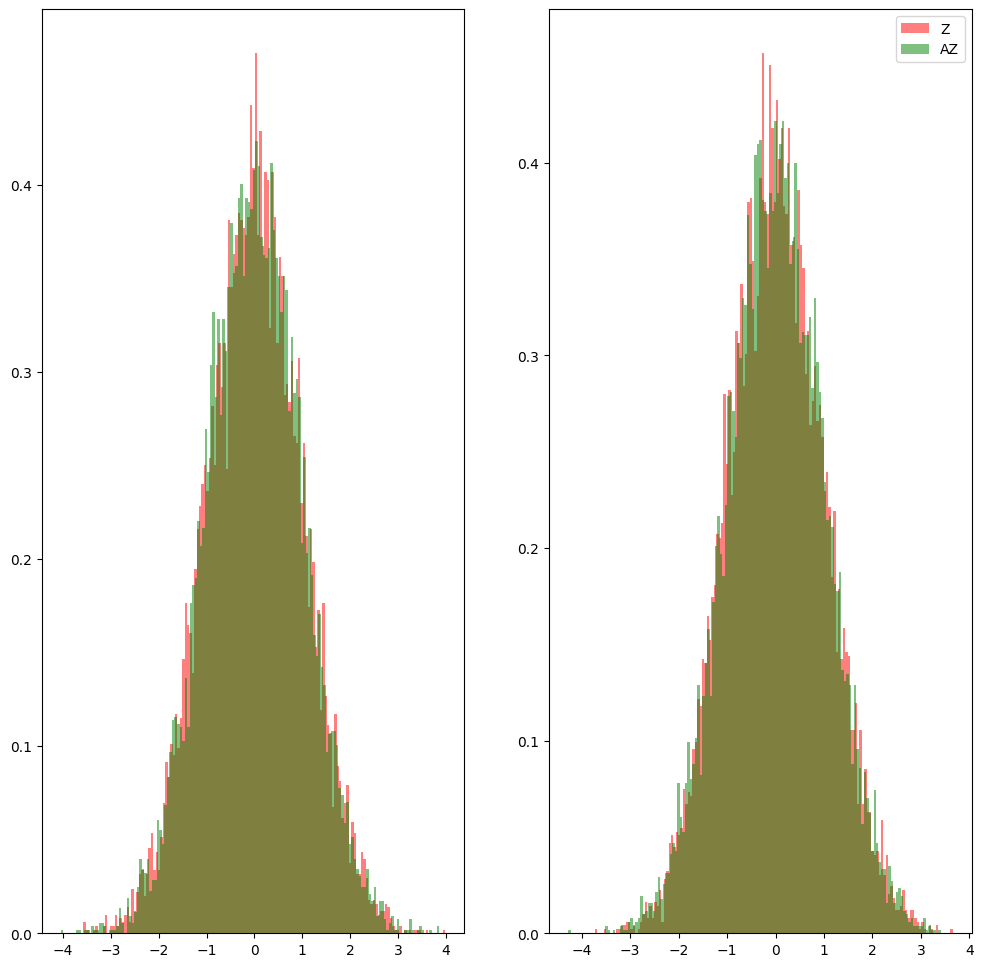

In [331]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.hist(Z[0,:], density=True, color='red', alpha=0.5, bins=150)
plt.hist(AZ[0,:], density=True, color='green', alpha=0.5, bins=150)


plt.subplot(1, 2, 2)
plt.hist(Z[1,:], density=True, color='red', label='Z', alpha=0.5, bins=150)
plt.hist(AZ[1,:], density=True, color='green', label='AZ', alpha=0.5, bins=150)

plt.legend()

plt.show()

In [332]:
_, p_value = stat.ks_2samp(Z[0,:], AZ[0,:])
print("p_val 1:", p_value)
_, p_value = stat.ks_2samp(Z[1,:], AZ[1,:])
print("p_val 2:", p_value)

p_val 1: 0.7576249852868608
p_val 2: 0.8127749152563353


On peut aussi le vérifier à la main assez facilement, en effet on sait que $AZ$ est une normale multivariée dont il est aisé de calculer ses paramètres :
$$AA^T=I_2=\operatorname{cov}(AZ)~~~~~~~\mathbb{E}(AZ)=A\mathbb{E}(Z)=0_2$$

Ce qui est confirmé empiriquement.

In [333]:
def J_anti(n=n_tirages, cov_mat=Sigma, sig=sigma):
    d = cov_mat.shape[0]
    
    L = np.linalg.cholesky(cov_mat)
    Z = np.random.normal(0, 1, (d, n))

    X = f((L @ Z).T, sig)
    Y = f((L @ (A @ Z)).T, sig)

    J = np.mean((X + Y)/2)
    se = np.std((X + Y)/2) / np.sqrt(n)

    return J, J - 1.96 * se, J + 1.96 *se

In [334]:
anti = [J_anti()[0] for _ in range(1000)]
mc = [J_mc()[0] for _ in range(1000)]

In [335]:
print(np.var(anti), np.var(mc))

3.045265842087125e-06 3.900830436406212e-06


On constate que la variance n'a baissé que très légèrement, ceci est expliquée par le fait que pour que la réduction soit grande il est nécessaire que les variables soient fortement corrélées négativement. Or on peut vérifier de façon empirique que ça n'est pas le cas. La covariance étant positive (mais faible heureusement) la réduction n'est pas énorme.

In [336]:
L = np.linalg.cholesky(Sigma)
Z = np.random.normal(0, 1, (2, 10**5))

X = f((L @ Z).T, sigma)
Y = f((L @ (A @ Z)).T, sigma)

In [337]:
print(np.cov(X, Y))

[[0.01931833 0.01286573]
 [0.01286573 0.01905964]]


In [338]:
def J_controle(n=n_tirages, cov_mat=Sigma, sig=sigma):
    X = np.random.multivariate_normal([0, 0], cov_mat, n_tirages)
    Y = np.exp(sig * X[:,0]) + np.exp(sig * X[:,1])
    f_X = f(X, sig)

    J = np.mean(f_X - Y) + np.exp(sig**2) + np.exp(sig**2 / 2)

    se = np.std(f_X - Y)/np.sqrt(n)

    return J, J - 1.96 * se, J + 1.96 * se, np.cov(f_X, Y)

In [339]:
anti = [J_anti()[0] for _ in range(1000)]
mc = [J_mc()[0] for _ in range(1000)]
controle = [J_controle()[0] for _ in range(1000)]

In [340]:
print(np.var(controle), np.var(anti), np.var(mc))

1.8528723052476487e-05 3.285009637258856e-06 3.965170609602085e-06


In [341]:
R = np.empty(3)
R[0] = np.var( [J_controle()[0] for _ in range(1000)] )/np.var( [J_anti()[0] for _ in range(1000)] )
R[1] = np.var( [J_controle()[0] for _ in range(1000)] )/np.var( [J_mc()[0] for _ in range(1000)] )
R[2] = np.var( [J_mc()[0] for _ in range(1000)] )/np.var( [J_anti()[0] for _ in range(1000)] )

In [342]:
print(f"RR - anti vs mc = {R[2]}")
print(f"RR - anti vs controle = {R[0]}")
print(f"RR - mc vs controle = {R[1]}")

RR - anti vs mc = 1.2735048940212144
RR - anti vs controle = 5.524077873569117
RR - mc vs controle = 4.583812404260722


La meilleure méthode est celle par variable antithétiques, elle diminue la variance de 30% par rapport à la Monte-Carlo classique. Ensuite vient la méthode Monte-Carlo classique et finalement la méthode par variable de contrôle est mauvaise.

Cela peut s'expliquer par le fait que le choix de la variable est très mauvais en cela qu'elle n'est que très peu corrélée avec f(X).

In [361]:
X = np.random.multivariate_normal([0, 0], Sigma, n_tirages)
Y = np.exp(sigma * X[:,0]) + np.exp(sigma * X[:,1])
f_X = f(X, sigma)

In [362]:
var_Y = (
    np.exp(2 * sigma**2 * Sigma[0,0]) +
    np.exp(2 * sigma**2 * Sigma[1,1]) +
    2 * np.exp(0.5 * sigma**2 * (Sigma[0,0] + 2*Sigma[0,1] + Sigma[1,1])) -
    (np.exp(0.5 * sigma**2 * Sigma[0,0]) + np.exp(0.5 * sigma**2 * Sigma[1,1]))**2
)


In [363]:
print(2 * np.cov(f_X, Y)[0, 1] - var_Y)

-0.07276398192327087


Cela confirme nos soupçons, on retrouve une valeur négative donc on augmente la variance de l'estimateur.